# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Alireza Farajtabrizi    
2.   Student Number: 97102185


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

dataset=np.array(dataset[['X','Y']])
np.random.shuffle(dataset)

x_train = dataset[:400,0]
y_train = dataset[:400,1]

x_test = dataset[400:,0]
y_test = dataset[400:,1]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
from numpy.linalg import inv

A=x_train.reshape(x_train.shape[0],1)
A=np.append(A,np.ones((A.shape[0],1)),axis=1)

m = np.dot(inv(np.dot(A.T,A)),np.dot((A.T),y_train))

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y  = m[0] * x_test  + m[1]

train_error = mean_squared_error(y_train,predicted_train_y)
test_error = mean_squared_error(y_test,predicted_test_y)

print(f"MSE train error : {train_error}\nMSE test error  : {test_error}")

MSE train error : 0.33166350078649015
MSE test error  : 0.3264051306545905


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

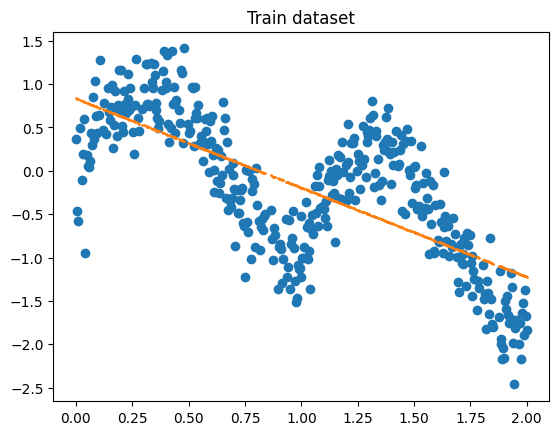

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")
plt.show()

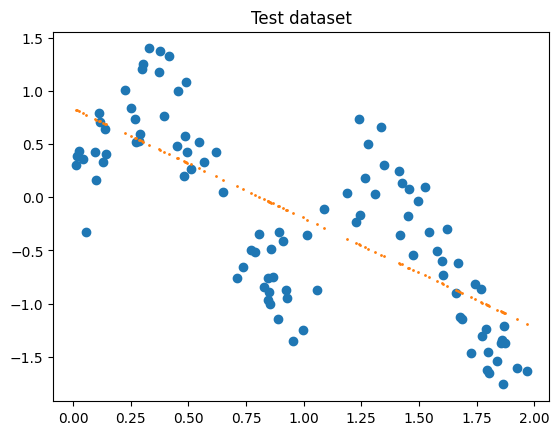

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")
plt.show()

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

The accuracies are low and not accpetable and the line doesn't fit the data good enough. The main problem is that the data is not linear and need a none-linear one like a third degree polynomial

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

yeah it will perform better for sure cause as you see you can approximate the data with 4 different lines 

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-np.dot(the_query_point-xi,(the_query_point-xi).T)/(2*(hyperparameter**2)))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X.reshape(train_X.shape[0],1), np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.dot(inv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),train_Y.reshape(train_Y.shape[0],1)))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
predicted_test = [predict(x_train, y_train, query,0.1) for query in x_test]
predicted_test=np.array(predicted_test).reshape(len(predicted_test),1)
error = mean_squared_error(y_test,predicted_test)
print(f"MSE test error: {error}")


MSE test error: 0.08723206903478052


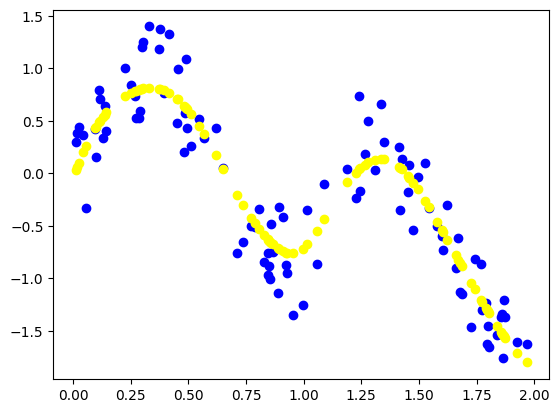

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")
plt.show()

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

yeah it is better by far cuase as I said before you can see from the plot that data follow 4 diiferent lines in 4 intervals

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

yeah it should perform well cause the logic of KNN is close to what we did in last part

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = ((x1-x2)*(x1-x2).T)**0.5
        return distance

    def return_nn_ids(self, x):
        dist_array=[self.distance(x,xi) for xi in self.X]
        dist_array=np.array(dist_array)
        indices = np.argsort(dist_array)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test ,predicted_y)
    return error, predicted_y

In [13]:
k = 5
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.1032012503234234


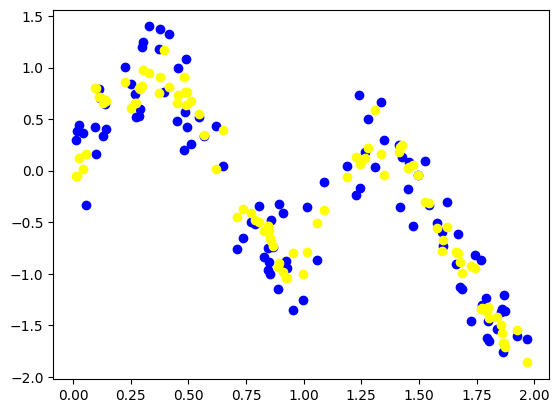

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")
plt.show()

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

In [15]:
Knn_list=[evaluation(k, x_train, y_train, x_test, y_test) for k in range(1,11)]
error_knn, predicted_y = min(Knn_list)

print('the best k is :',Knn_list.index(min(Knn_list))+1)
print(f"MSE error of KNN for test dataset: {error_knn}")

the best k is : 10
MSE error of KNN for test dataset: 0.09049289770315948


yeah it performs good and the  cause data has similar functions in short intervals
